<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/ud_l6_transfer_lng_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
CLASSIFIER_URL="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES=224

model=tf.keras.Sequential([hub.KerasLayer(CLASSIFIER_URL,input_shape=(IMAGE_RES,IMAGE_RES,3))])

In [7]:
import numpy as np
import PIL.Image as Image

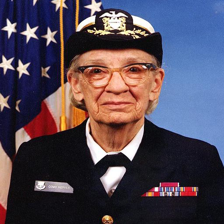

In [8]:
grace_hopper=tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper=Image.open(grace_hopper).resize((IMAGE_RES,IMAGE_RES))
grace_hopper

In [9]:
grace_hopper=np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [10]:
result=model.predict(grace_hopper[np.newaxis,...])
result.shape

(1, 1001)

In [11]:
predicted_class=np.argmax(result)
predicted_class

653

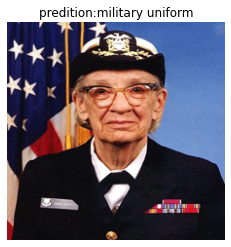

In [12]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(grace_hopper)
plt.axis('off')
predicted_classname=imagenet_labels[predicted_class]
_=plt.title('predition:' + predicted_classname)

In [13]:
imagenet_labels[predicted_class]

'military uniform'

# **`Predict the Dogs and cats with pre-trained model`**

In [14]:
(train_examples, validation_examples), info=tfds.load('cats_vs_dogs',split=['train[:80%]','train[80%:]'],with_info=True,as_supervised=True)

In [15]:
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

In [16]:
for i,example_image in enumerate(train_examples.take(3)):
  print('Image {} shape: {}'.format(i,example_image[0].shape))

Image 0 shape: (262, 350, 3)
Image 1 shape: (409, 336, 3)
Image 2 shape: (493, 500, 3)


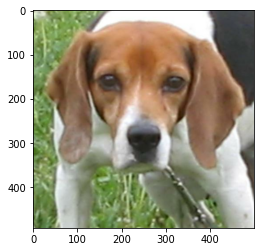

In [21]:
plt.imshow(example_image[0])

In [22]:
def format_image(image,label):
  image=tf.image.resize(image,(IMAGE_RES,IMAGE_RES))/255.0
  return image,label

BATCH_SIZE=32

train_batches=train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches=validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [23]:
image_batch,label_batch=next(iter(train_batches.take(1)))
image_batch=image_batch.numpy()
label_batch=label_batch.numpy()

result_batch=model.predict(image_batch)

predicted_class_names=imagenet_labels[np.argmax(result_batch,axis=-1)]
predicted_class_names

array(['Egyptian cat', 'tabby', 'Labrador retriever', 'tiger cat',
       'Border collie', 'kuvasz', 'chow', 'Persian cat',
       'German shepherd', 'Irish terrier', 'Egyptian cat', 'dalmatian',
       'Walker hound', 'Rhodesian ridgeback', 'schipperke',
       'Irish wolfhound', 'grey fox', 'Rhodesian ridgeback', 'Eskimo dog',
       'Egyptian cat', 'German shepherd', 'toilet seat',
       'English foxhound', 'Persian cat', 'tabby', 'Persian cat', 'boxer',
       'tabby', 'tabby', 'carton', 'tabby', 'Siamese cat'], dtype='<U30')

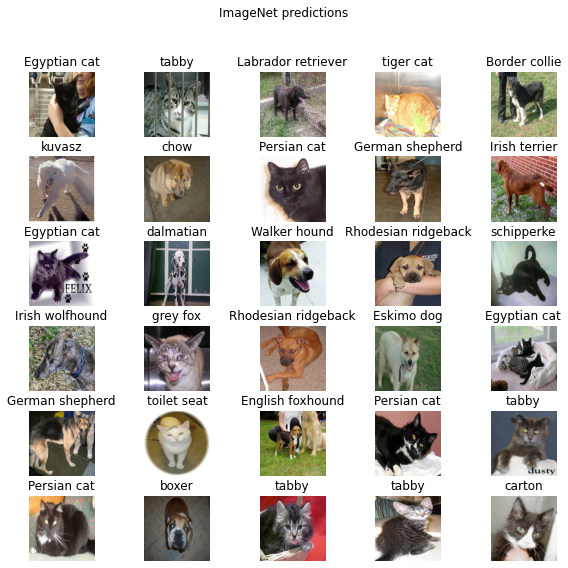

In [24]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")